<a href="https://colab.research.google.com/github/joshual777/PatronesProyecto3/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 3 Aprendizaje no supervisado**

Integrantes: \
Jose Jualian Camacho Hernandez \
Leonardo Guillén Fernandez \
Joshua Guzmán Quesada

## Experimento 1

In [2]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from skimage import io, color, feature
from skimage.transform import resize
from skimage.measure import regionprops
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# Verificar si hay una GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Directorio que contiene las imágenes de las hojas
data_dir = 'test'

# Lista para almacenar las características y las etiquetas
features = []
labels = []
i = 0
# Iterate over the subfolders in the main folder
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    print('Main: ', class_folder)
    if os.path.isdir(class_path):
        # Iterate over the images in each subfolder
        for folder in os.listdir(class_path):
            print(folder)
            folder_path = os.path.join(class_path, folder)
            if os.path.isdir(folder_path):
                for image_file in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_file)
                    if image_file.endswith('.JPG'):
                        # Load the image and resize it
                        image = io.imread(image_path)
                        image = resize(image, (256, 256))
                        # Normalize pixel values between 0 and 1
                        image = image.astype(np.float32) / 255.0
                        # Convert the image to grayscale
                        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                        # Add the features and label to the lists
                        features.append(gray_image)
                        labels.append(i)
        i+=1

# Convertir las listas en matrices numpy
features = np.array(features)
labels = np.array(labels)

# Normalizar las características
features = normalize(features.reshape(features.shape[0], -1))

# Convertir las características y las etiquetas a tensores
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels)

Main:  healthy
Strawberry___healthy
Pepper,_bell___healthy
Peach___healthy
Corn___healthy
Apple___healthy
Tomato___healthy
Grape___healthy
Potato___healthy
Cherry___healthy
Soybean___healthy
Blueberry___healthy
Raspberry___healthy
Main:  unhealthy
Apple___Cedar_apple_rust
Tomato___Early_blight
Grape___Esca_(Black_Measles)
Cherry___Powdery_mildew
Corn___Northern_Leaf_Blight
Corn___Common_rust
Tomato___Leaf_Mold
Strawberry___Leaf_scorch
Tomato___Target_Spot
Apple___Apple_scab
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Early_blight
Tomato___Bacterial_spot
Apple___Black_rot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot
Corn___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Squash___Powdery_mildew
Tomato___Tomato_mosaic_virus
Orange___Haunglongbing_(Citrus_greening)
Pepper,_bell___Bacterial_spot
Grape___Black_rot
Tomato___Late_blight
Potato___Late_blight
Peach___Bacterial_spot


In [3]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Convert PyTorch tensors to NumPy arrays
train_features = train_features.numpy()
test_features = test_features.numpy()
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()

## Primera Distribución de Datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score

def computeMetrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)        # Calcular la exactitud   
    prec = precision_score(y_test, y_pred)      # Calcular la precisión    
    rec = recall_score(y_test, y_pred)          # Calcular el recall
    f1 = f1_score(y_test, y_pred)               # Calcular F1 score
    auc = roc_auc_score(y_test, y_pred)         # Calcular el AUC
    # Desplegar métricas
    metrics = {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1 Score":f1, "AUC":auc}
    df = pd.DataFrame(metrics, index = [0])
    display(df)
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve and AUC')
    plt.legend(loc="lower right")
    plt.show()


### Clasificador sin autoencoder

#### Conjunto de Training

2023-06-09 21:48:45.347462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 21:48:50.506887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10
17/17 [==============================] - 3s 78ms/step - loss: 0.6574 - accuracy: 0.6761
Epoch 2/10
17/17 [==============================] - 1s 70ms/step - loss: 0.6200 - accuracy: 0.6761
Epoch 3/10
17/17 [==============================] - 1s 69ms/step - loss: 0.6098 - accuracy: 0.6761
Epoch 4/10
17/17 [==============================] - 1s 70ms/step - loss: 0.6184 - accuracy: 0.6761
Epoch 5/10
17/17 [==============================] - 1s 73ms/step - loss: 0.6234 - accuracy: 0.6761
Epoch 6/10
17/17 [==============================] - 1s 69ms/step - loss: 0.5963 - accuracy: 0.6761
Epoch 7/10
17/17 [==============================] - 1s 69ms/step - loss: 0.5902 - accuracy: 0.6761
Epoch 8/10
17/17 [==============================] - 1s 71ms/step - loss: 0.5853 - accuracy: 0.6761
Epoch 9/10
17/17 [==============================] - 1s 70ms/step - loss: 0.5780 - accuracy: 0.6780
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.6288
Test Loss: 0

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.628788,0.628788,1.0,0.772093,0.5


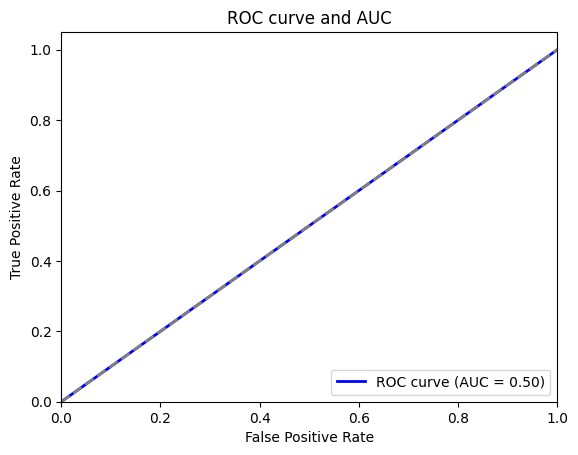

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=65536),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define batch size
batch_size = 32
# Train the model with batches
epochs = 10
model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs)
# Evaluate the model with batches
loss, accuracy = model.evaluate(test_features, test_labels, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
# Make predictions
predictions = model.predict(test_features, batch_size=batch_size)
predictions = (predictions > 0.5).astype(int)
# Compute metrics
print('Resultados esperados: ', test_labels[:20])
print('Resultados obtenidos: ', predictions[:20])
computeMetrics(test_labels, predictions)


#### Conjunto de Testing

Epoch 1/10
5/5 [==============================] - 1s 69ms/step - loss: 0.6368 - accuracy: 0.6288
Epoch 2/10
5/5 [==============================] - 0s 70ms/step - loss: 0.6111 - accuracy: 0.6288
Epoch 3/10
5/5 [==============================] - 0s 67ms/step - loss: 0.6332 - accuracy: 0.6288
Epoch 4/10
5/5 [==============================] - 0s 71ms/step - loss: 0.6232 - accuracy: 0.6288
Epoch 5/10
5/5 [==============================] - 0s 79ms/step - loss: 0.6213 - accuracy: 0.6288
Epoch 6/10
5/5 [==============================] - 0s 71ms/step - loss: 0.6078 - accuracy: 0.6288
Epoch 7/10
5/5 [==============================] - 0s 65ms/step - loss: 0.6055 - accuracy: 0.6288
Epoch 8/10
5/5 [==============================] - 0s 68ms/step - loss: 0.6164 - accuracy: 0.6288
Epoch 9/10
5/5 [==============================] - 0s 66ms/step - loss: 0.6024 - accuracy: 0.6288
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 0.6288
Test Loss: 0.5916842222213745


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.628788,0.628788,1.0,0.772093,0.5


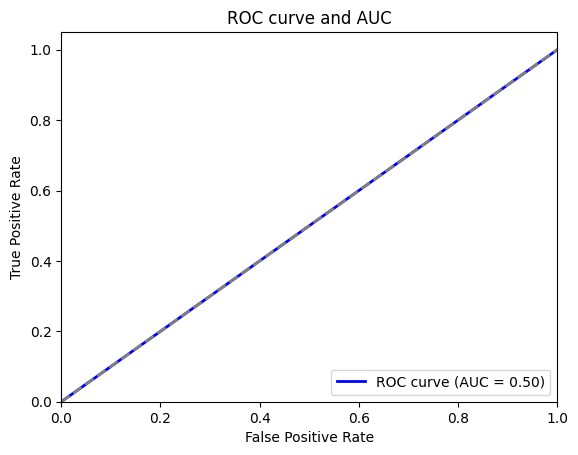

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define batch size
batch_size = 32
# Train the model with batches
epochs = 10
model.fit(test_features, test_labels, batch_size=batch_size, epochs=epochs)
# Evaluate the model with batches
loss, accuracy = model.evaluate(test_features, test_labels, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
# Make predictions
predictions = model.predict(test_features, batch_size=batch_size)
predictions = (predictions > 0.5).astype(int)
# Compute metrics
print('Resultados esperados: ', test_labels[:20])
print('Resultados obtenidos: ', predictions[:20])
computeMetrics(test_labels, predictions)

### Autoencoder

In [1]:
# Define the autoencoder model
input_dim = 65536       # Dimensionality of the input data
encoded_dim = 16384     # Dimensionality of the encoded representations

encoder_input = keras.Input(shape=(input_dim,))
encoder_output = keras.layers.Dense(encoded_dim, activation='relu')(encoder_input)
decoder_output = keras.layers.Dense(input_dim, activation='sigmoid')(encoder_output)
autoencoder = keras.Model(inputs=encoder_input, outputs=decoder_output)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the autoencoder model
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(train_features, train_features, epochs=epochs, batch_size=batch_size)
# Obtain the encoded representations
encoded_features = autoencoder.encoder.predict(train_features)

# Split the encoded data into training and testing sets
train_enc_features, test_enc_features, train_labels, test_labels = train_test_split(
    encoded_features, labels, test_size=0.2, random_state=42)


NameError: name 'keras' is not defined

In [ ]:

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=<encoded_dim>),  # Adjust input_dim with the appropriate value
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define batch size
batch_size = 32

# Train the model with encoded data
epochs = 10
model.fit(train_enc_features, train_labels, batch_size=batch_size, epochs=epochs)

# Evaluate the model with encoded data
loss, accuracy = model.evaluate(test_enc_features, test_labels, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions with encoded data
predictions = model.predict(test_enc_features, batch_size=batch_size)